In [15]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

# Load dataset function
def load_dataset(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for img in os.listdir(label_dir):
                images.append(os.path.join(label_dir, img))  # Full image path
                labels.append(label)  # Folder name is the label
            print(f"{label} Completed")
    return images, labels

# Load and shuffle training data
TRAIN_DIR = 'data_split/train'
train = pd.DataFrame()
train['image'], train['emotion'] = load_dataset(TRAIN_DIR)
train = train.sample(frac=1).reset_index(drop=True)

# Extract features from images
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))  # 48x48 grayscale image
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)  # Add channel dimension for grayscale
    return features

# Normalize image data
def preprocess_images():
    train_features = extract_features(train['image'])
    x_train = train_features / 255.0

    # Label encoding
    le = LabelEncoder()
    le.fit(train['emotion'])
    y_train = le.transform(train['emotion'])
    
    return x_train, y_train, le

x_train, y_train, le = preprocess_images()

# Load and preprocess test data (you can do similar steps as for training data)
TEST_DIR = 'data_split/test'
test = pd.DataFrame()
test['image'], test['emotion'] = load_dataset(TEST_DIR)
test_features = extract_features(test['image'])
x_test = test_features / 255.0
y_test = le.transform(test['emotion'])

# Final check for shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


anger Completed
contempt Completed
disgust Completed
fear Completed
happiness Completed
neutral Completed
sadness Completed
surprise Completed


100%|███████████████████████████████████████████████████████████████████████████| 10947/10947 [00:19<00:00, 567.29it/s]


anger Completed
contempt Completed
disgust Completed
fear Completed
happiness Completed
neutral Completed
sadness Completed
surprise Completed


100%|█████████████████████████████████████████████████████████████████████████████| 2738/2738 [00:03<00:00, 762.63it/s]

x_train shape: (10947, 48, 48, 1)
y_train shape: (10947,)
x_test shape: (2738, 48, 48, 1)
y_test shape: (2738,)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the LeNet-like CNN model
def build_lenet_model(input_shape, num_classes):
    model = Sequential()
    
    # C1: Convolutional Layer (5x5 filters, 32 filters)
    model.add(Conv2D(32, (5, 5), activation='relu', input_shape=input_shape))
    
    # S2: Subsampling (Max Pooling layer)
    model.add(MaxPooling2D((2, 2)))
    
    # C3: Convolutional Layer (5x5 filters, 64 filters)
    model.add(Conv2D(64, (5, 5), activation='relu'))
    
    # S4: Subsampling (Max Pooling layer)
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten the output from the convolutional layers
    model.add(Flatten())
    
    # F5: Fully connected layer with 120 units
    model.add(Dense(120, activation='relu'))
    
    # F6: Fully connected layer with 84 units
    model.add(Dense(84, activation='relu'))
    
    # Output layer (softmax activation for multi-class classification)
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Define the input shape (48x48 grayscale images with 1 channel) and number of classes
input_shape = (48, 48, 1)
num_classes = len(le.classes_)  # The number of unique emotions

# Create the LeNet model
model = build_lenet_model(input_shape, num_classes)

# Print the model summary
model.summary()


C:\Users\HARSHITA RAJPUT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 44, 44, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 18, 18, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 120)                 │         622,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8)                   │             680 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 685,140 (2.61 MB)

 Trainable params: 685,140 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/5
343/343 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5634 - loss: 1.0236 - val_accuracy: 0.7812 - val_loss: 0.6417
Epoch 2/5
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7761 - loss: 0.6519 - val_accuracy: 0.8057 - val_loss: 0.5785
Epoch 3/5
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8131 - loss: 0.5550 - val_accuracy: 0.8061 - val_loss: 0.5648
Epoch 4/5
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8252 - loss: 0.5021 - val_accuracy: 0.8225 - val_loss: 0.4994
Epoch 5/5
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8392 - loss: 0.4651 - val_accuracy: 0.8251 - val_loss: 0.5257


In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7910 - loss: 0.7324
Test Loss: 0.5257256627082825
Test Accuracy: 0.8250547647476196


In [20]:
# Save the trained model
model.save('emotion_recognition_lenet_model.keras')


Original Output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Output: neutral


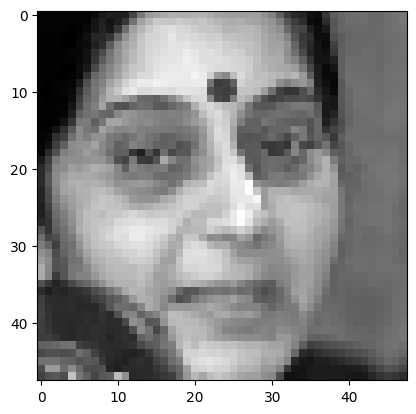

In [23]:
image_index = random.randint(0, len(test))
print("Original Output:", test['emotion'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');


Original Output: happiness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Output: happiness


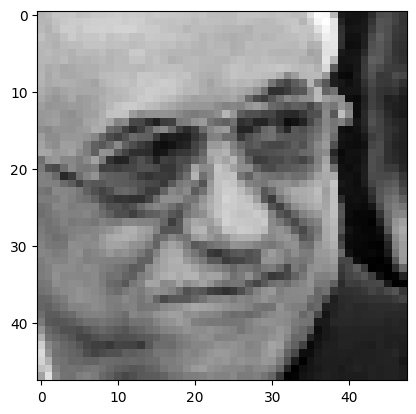

In [24]:
image_index = random.randint(0, len(test))
print("Original Output:", test['emotion'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Output: neutral


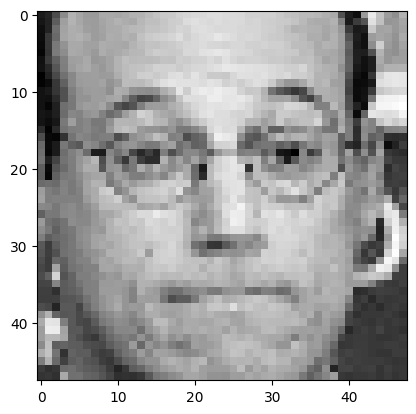

In [25]:
image_index = random.randint(0, len(test))
print("Original Output:", test['emotion'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Output: neutral


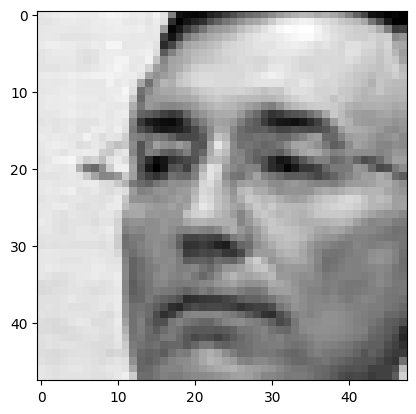

In [26]:
image_index = random.randint(0, len(test))
print("Original Output:", test['emotion'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Output: neutral


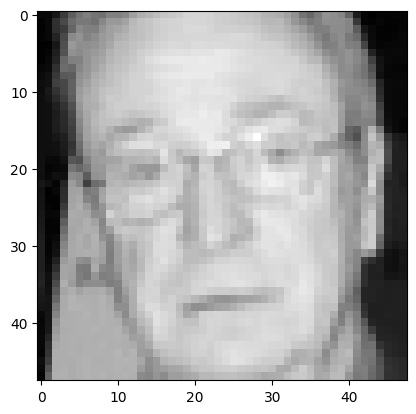

In [27]:
image_index = random.randint(0, len(test))
print("Original Output:", test['emotion'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Output: neutral


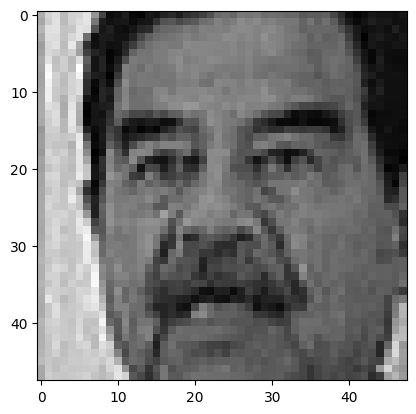

In [30]:
image_index = random.randint(0, len(test))
print("Original Output:", test['emotion'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Output: happiness


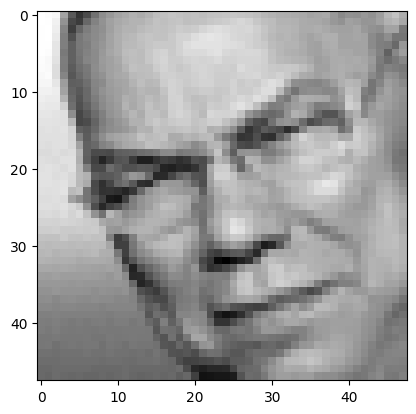

In [32]:
image_index = random.randint(0, len(test))
print("Original Output:", test['emotion'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');